# Sections

In [1]:
from sectionproperties.pre.library.primitive_sections import circular_section
from sigmaepsilon.solid import BeamSection

geometry = circular_section(d=50, n=64)

In [2]:
from sigmaepsilon.solid.model.bernoulli.section import get_section

mesh_params = dict(n_max=500)
section = get_section('CHS', d=1.0, t=0.1, n=64, mesh_params=mesh_params)

In [3]:
from linkeddeepdict.tools import getallfromkwargs

section = BeamSection('CHS', d=1.0, t=0.1, n=64)
section.calculate_section_properties()
section_props = section.section_properties
A, Ix, Iy, Iz = getallfromkwargs(['A', 'Ix', 'Iy', 'Iz'], **section_props)

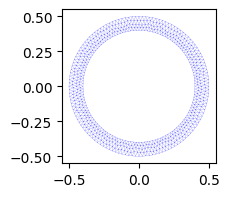

In [4]:
import numpy as np
from polymesh.tri.trimesh import triangulate
from polymesh.topo.tr import T6_to_T3
import matplotlib.pyplot as plt
from dewloosh.mpl import triplot

scoords, stopo = section.coords(), section.topology()
path = np.array([[0, 5, 4], [5, 1, 3], [3, 2, 4], [5, 3, 4]], dtype=int)
scoords, stopo = T6_to_T3(scoords, stopo, path=path)
triobj = triangulate(points=scoords, triangles=stopo)[-1]
fig, ax = plt.subplots(figsize=(4, 2))
triplot(triobj, fig=fig, ax=ax, lw=0.1)

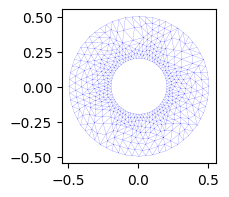

In [6]:
mesh_params = dict(n_max=20)
section = BeamSection('CHS', d=1.0, t=0.3, n=32, mesh_params=mesh_params)
scoords, stopo = section.coords(), section.topology()
path = np.array([[0, 5, 4], [5, 1, 3], [3, 2, 4], [5, 3, 4]], dtype=int)
scoords, stopo = T6_to_T3(scoords, stopo, path=path)
triobj = triangulate(points=scoords, triangles=stopo)[-1]
fig, ax = plt.subplots(figsize=(4, 2))
triplot(triobj, fig=fig, ax=ax, lw=0.1)